In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression           #Gerekli kütüphaneler import edildi
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [2]:
dfN = pd.read_excel("KONTR.xlsx")        #Çalışma sayfası dahil edilir

In [3]:
df = dfN.copy()   #Datanın kopyası üzerinden projeye devam ediliyor

In [ ]:
df.head(3)      #Çalışma sayfasının ilk üç değeri getirilir

,Tarih,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %
0,2024-08-09,50.00,51.7,52.55,49.58,"14,06M",-0.0263
1,2024-08-08,51.35,52.0,52.50,51.00,"12,80M",-0.0087
2,2024-08-07,51.80,52.6,53.45,51.30,"15,36M",-0.0067


In [ ]:
df.tail(3)           #Çalışma sayfasının son üç değeri getirilir

,Tarih,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %
896,2021-01-06,3.20,3.24,3.27,3.12,"20,33M",0.0063
897,2021-01-05,3.18,2.97,3.23,2.92,"42,97M",0.0707
898,2021-01-04,2.97,2.75,3.03,2.68,"30,91M",0.0761


In [ ]:
df.info()           #Özet bilgiler alınır

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Tarih   899 non-null    datetime64[ns]
 1   Şimdi   899 non-null    float64       
 2   Açılış  899 non-null    float64       
 3   Yüksek  899 non-null    float64       
 4   Düşük   899 non-null    float64       
 5   Hac.    899 non-null    object        
 6   Fark %  899 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 49.3+ KB


In [ ]:
df.columns      #Datanın kolon isimleri getirilir

Index(['Tarih', 'Şimdi', 'Açılış', 'Yüksek', 'Düşük', 'Hac.', 'Fark %'], dtype='object')

In [ ]:
df.describe().T    #Özet İstatistiksel bilgiler alınır

,count,mean,min,25%,50%,75%,max,std
Tarih,899,2022-10-20 18:18:49.254727168,2021-01-04 00:00:00,2021-11-29 12:00:00,2022-10-20 00:00:00,2023-09-16 12:00:00,2024-08-09 00:00:00,NaN
Şimdi,899.0,67.764394,2.97,8.985,53.4,118.875,207.14,60.827425
Açılış,899.0,68.043804,2.75,9.055,52.7,120.06,207.38,61.270013
Yüksek,899.0,70.050078,3.03,9.41,55.49,124.645,216.0,62.947991
Düşük,899.0,66.118109,2.68,8.715,51.8,115.46,202.71,59.499084
Fark %,899.0,0.004319,-0.463,-0.02155,0.0,0.02415,0.1011,0.045827


In [ ]:
df.shape      #Satrı sütün sayısı öğrenilir

(899, 7)

In [ ]:
df.isnull().any()     #Data içinde boş değer varmı kontrol edilir

,0
Tarih,False
Şimdi,False
Açılış,False
Yüksek,False
Düşük,False
Hac.,False
Fark %,False


In [ ]:
df['Hac.'] = df['Hac.'].str.replace("M", "")

In [ ]:
df.head(3)

,Tarih,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %
0,2024-08-09,50.00,51.7,52.55,49.58,"14,06",-0.0263
1,2024-08-08,51.35,52.0,52.50,51.00,"12,80",-0.0087
2,2024-08-07,51.80,52.6,53.45,51.30,"15,36",-0.0067


Text(0, 0.5, 'Fiyat')

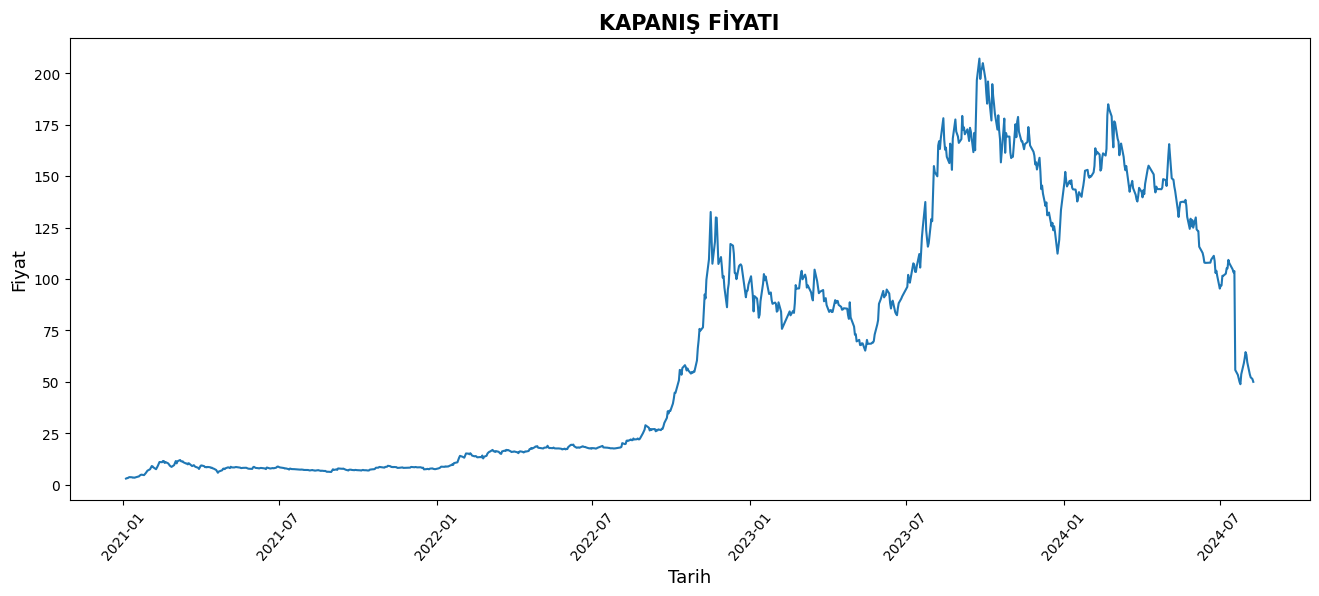

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(df['Tarih'], df['Şimdi'], label='Kapanış Fiyatı')
plt.title("KAPANIŞ FİYATI", fontsize=15, fontweight='bold')
plt.xlabel("Tarih", fontsize = 13)
plt.xticks(rotation =50)
plt.ylabel("Fiyat", fontsize =13)
plt.show()

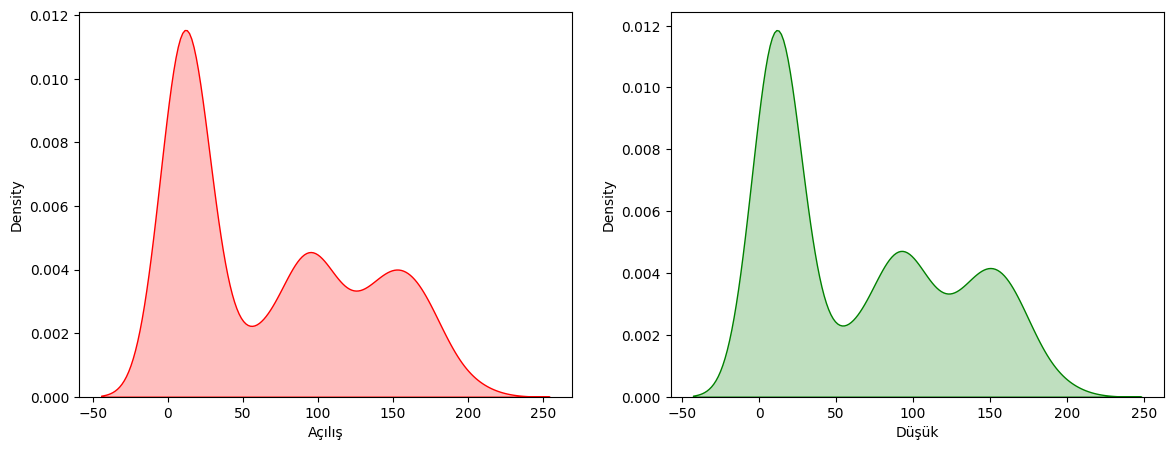

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.kdeplot(df.Açılış, shade = True, color ='red')

plt.subplot(1,2,2)
sns.kdeplot(df.Düşük, shade=True, color= 'green')

plt.show()

In [6]:
corrDeger = df.select_dtypes(include=[float, int])

In [7]:
corr = corrDeger.corr()

In [8]:
print(corr)

           Şimdi    Açılış    Yüksek     Düşük
Şimdi   1.000000  0.998312  0.999326  0.999164
Açılış  0.998312  1.000000  0.999309  0.999399
Yüksek  0.999326  0.999309  1.000000  0.999215
Düşük   0.999164  0.999399  0.999215  1.000000


In [ ]:
y= df[["Şimdi"]]
x= df.drop(["Şimdi", "Tarih","Hac."], axis=1)

In [ ]:
x_train, x_test, y_train, y_test =train_test_split(x,y, train_size=0.70, random_state=21)

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
start_train_time = time.time()                      #LINEAR REGRESSOR KULLANIMI
lm = LinearRegression()
model = lm.fit(x_train_scaled, y_train)
end_train_time = time.time()
total_time1 = end_train_time - start_train_time


y_train_pred = lm.predict(x_train_scaled)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_kare = r2_score(y_train, y_train_pred)


start_test_time = time.time()
y_test_pred = lm.predict(x_test_scaled)
end_test_time = time.time()
total_time2 = end_test_time - start_test_time


test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_kare = r2_score(y_test, y_test_pred)


print(f"Train_Time: {total_time1}")
print(f"Train_MSE: {train_mse}")
print(f"Train_MAE: {train_mae}")
print(f"Train_MAPE:{train_mape}")
print(f"Train_R2: {train_kare}")
print(f"Test_Time:{total_time2}")
print(f"Test_MSE: {test_mse}")
print(f"Test_MAE: {test_mae}")
print(f"Test_MAPE:{test_mape}")
print(f"Test_R2:{test_kare}")


Train_Time: 0.003654003143310547
Train_MSE: 1.9247218962180035
Train_MAE: 0.8399615784540421
Train_MAPE:0.025656745081028904
Train_R2: 0.9994744121917799
Test_Time:0.0005075931549072266
Test_MSE: 1.7954049021296503
Test_MAE: 0.8706393147748652
Test_MAPE:0.026978332001522363
Test_R2:0.9995239918350397


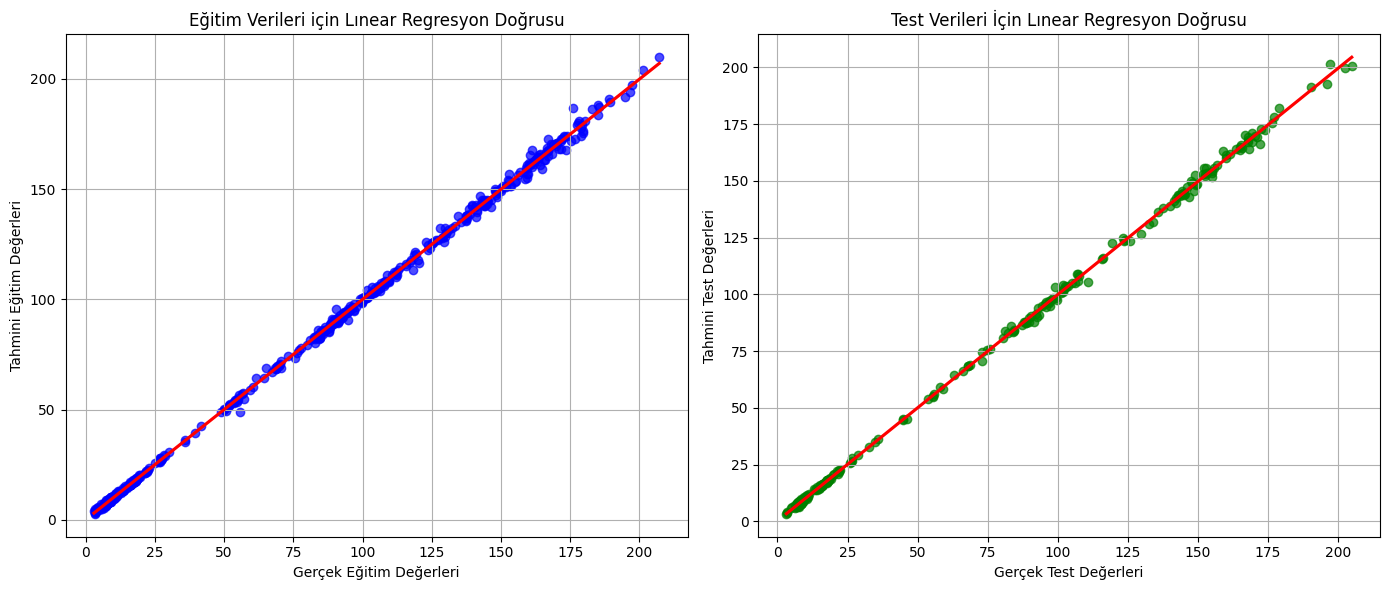

In [ ]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.regplot(x=y_train, y=y_train_pred, ci=None, scatter_kws={"alpha":0.7, "color":"blue"}, line_kws={"color":"red"})
plt.xlabel('Gerçek Eğitim Değerleri')
plt.ylabel('Tahmini Eğitim Değerleri')
plt.title('Eğitim Verileri için Lınear Regresyon Doğrusu')
plt.grid(True)



plt.subplot(1, 2, 2)
sns.regplot(x=y_test, y=y_test_pred, ci=None, scatter_kws={"alpha":0.7, "color":"green"}, line_kws={"color":"red"})
plt.xlabel('Gerçek Test Değerleri')
plt.ylabel('Tahmini Test Değerleri')
plt.title('Test Verileri İçin Lınear Regresyon Doğrusu')
plt.grid(True)

plt.tight_layout()
plt.show()

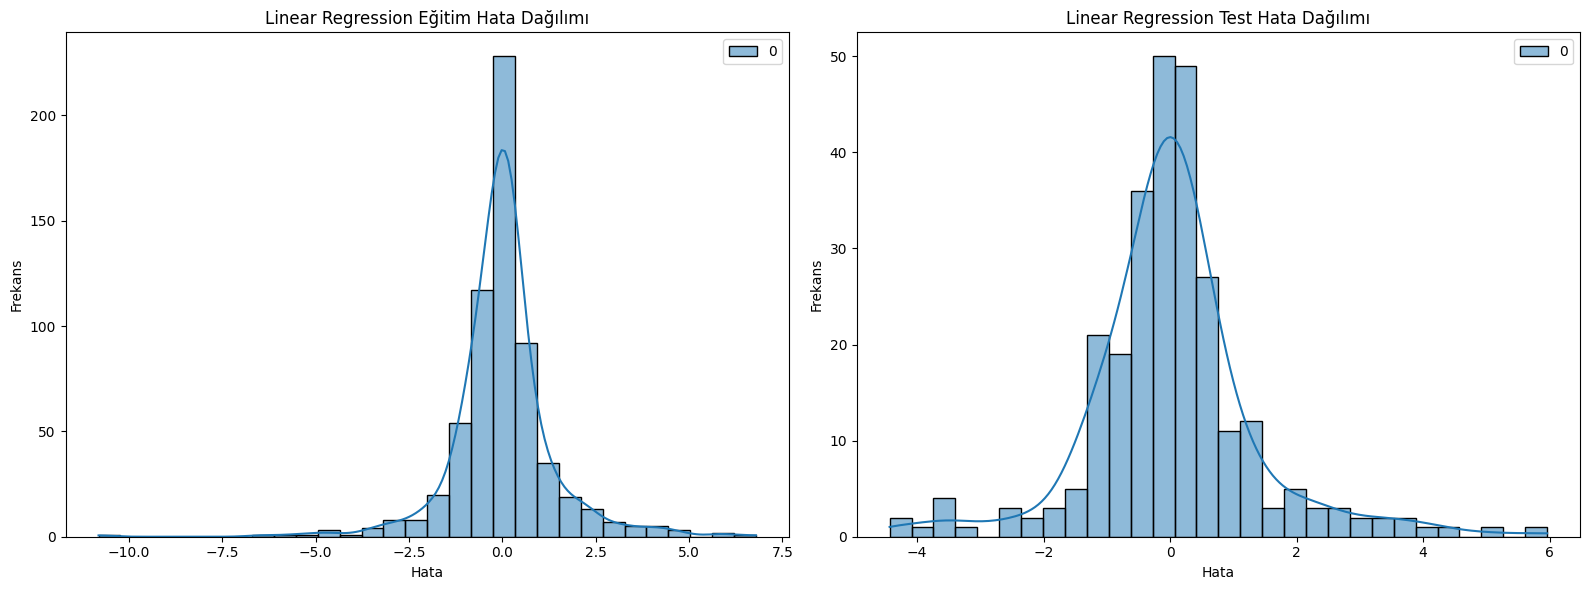

In [ ]:
# Eğitim ve test hatalarını hesaplayın
train_errors = y_train - y_train_pred
test_errors = y_test - y_test_pred

# Grafik oluşturma
plt.figure(figsize=(16, 6))

# Eğitim hataları histogramı
plt.subplot(1, 2, 1)
sns.histplot(train_errors.values, kde=True, color='blue', bins=30)
plt.title('Linear Regression Eğitim Hata Dağılımı')
plt.xlabel('Hata')
plt.ylabel('Frekans')

# Test hataları histogramı
plt.subplot(1, 2, 2)
sns.histplot(test_errors.values, kde=True, color='blue', bins=30)
plt.title('Linear Regression Test Hata Dağılımı')
plt.xlabel('Hata')
plt.ylabel('Frekans')

plt.tight_layout()
plt.show()


In [ ]:
randomForest_params = {                            #RANDOM FOREST REGRESSOR KULLANIMI
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=21)
grid_search = GridSearchCV(estimator=rf, param_grid=randomForest_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

start_train_time = time.time()
grid_search.fit(x_train_scaled, y_train)
best_model = grid_search.best_estimator_
end_train_time = time.time()
total_time1 = end_train_time - start_train_time

print("En İyi Parametreler: ", grid_search.best_params_)
print("En İyi CV Skoru (Negatif MSE): ", -grid_search.best_score_)

y_train_pred2 = best_model.predict(x_train_scaled)
train_mse = mean_squared_error(y_train, y_train_pred2)
train_mae = mean_absolute_error(y_train, y_train_pred2)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred2)
train_kare = r2_score(y_train, y_train_pred2)

start_test_time = time.time()
y_test_pred2 = best_model.predict(x_test_scaled)
end_test_time = time.time()
total_time2 = end_test_time - start_test_time

test_mse = mean_squared_error(y_test, y_test_pred2)
test_mae = mean_absolute_error(y_test, y_test_pred2)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred2)
test_kare = r2_score(y_test, y_test_pred2)

print(f"Train_Time: {total_time1}")
print(f"Train_MSE: {train_mse}")
print(f"Train_MAE: {train_mae}")
print(f"Train_MAPE: {train_mape}")
print(f"Train_R2: {train_kare}")
print(f"Test_Time: {total_time2}")
print(f"Test_MSE: {test_mse}")
print(f"Test_MAE: {test_mae}")
print(f"Test_MAPE: {test_mape}")
print(f"Test_R2: {test_kare}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
En İyi Parametreler:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
En İyi CV Skoru (Negatif MSE):  3.329753869981282
Train_Time: 142.23238253593445
Train_MSE: 0.4328831899680259
Train_MAE: 0.3712738696116545
Train_MAPE: 0.006358643463713853
Train_R2: 0.9998817916876834
Test_Time: 0.015468358993530273
Test_MSE: 2.8719426296132933
Test_MAE: 1.0018604319828808
Test_MAPE: 0.0168059685869177
Test_R2: 0.9992385739064366


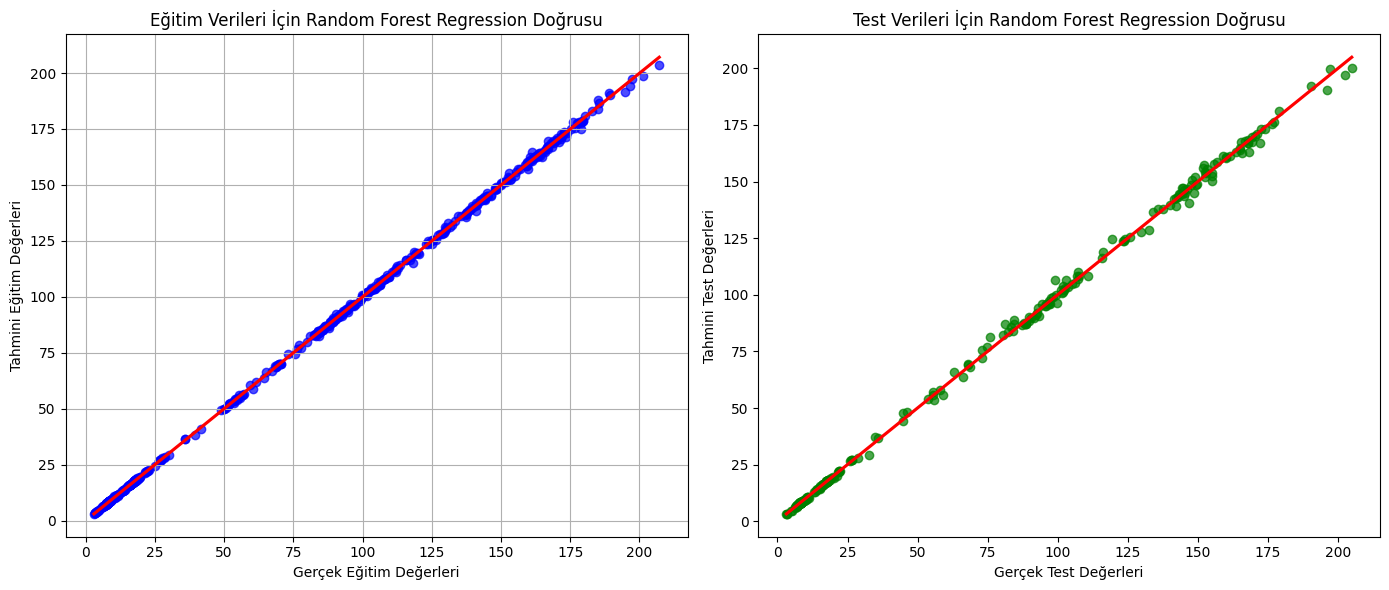

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.regplot(x= y_train, y= y_train_pred2, ci =None, scatter_kws={"alpha":0.7, "color":"blue"}, line_kws={"color":"red"})
plt.xlabel("Gerçek Eğitim Değerleri")
plt.ylabel("Tahmini Eğitim Değerleri")
plt.title("Eğitim Verileri İçin Random Forest Regression Doğrusu")
plt.grid(True)


plt.subplot(1,2,2)
sns.regplot(x= y_test, y= y_test_pred2, ci=None, scatter_kws={"alpha": 0.7, "color": "green"}, line_kws={"color":"red"})
plt.xlabel("Gerçek Test Değerleri")
plt.ylabel("Tahmini Test Değerleri")
plt.title("Test Verileri İçin Random Forest Regression Doğrusu")

plt.tight_layout()
plt.show()

In [ ]:
xgb_params = {
    'n_estimators': [100, 200, 300],                        #XGB REGRESSOR KULLANILDI
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

xgb = XGBRegressor()
grid_search2 = GridSearchCV(estimator=xgb, param_grid=xgb_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)


start_train_time = time.time()
grid_search2.fit(x_train_scaled, y_train)
best_model = grid_search2.best_estimator_
end_train_time = time.time()
total_train_time = end_train_time - start_train_time

print("En İyi Parametreler: ", grid_search2.best_params_)
print("En İyi CV Skoru (Negatif MSE): ", -grid_search2.best_score_)


y_train_pred3 = best_model.predict(x_train_scaled)
train_mse = mean_squared_error(y_train, y_train_pred3)
train_mae = mean_absolute_error(y_train, y_train_pred3)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred3)
train_r2 = r2_score(y_train, y_train_pred3)

start_test_time = time.time()
y_test_pred3 = best_model.predict(x_test_scaled)
end_test_time = time.time()
total_test_time = end_test_time - start_test_time

test_mse = mean_squared_error(y_test, y_test_pred3)
test_mae = mean_absolute_error(y_test, y_test_pred3)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred3)
test_r2 = r2_score(y_test, y_test_pred3)

print(f"Train Time: {total_train_time}")
print(f"Train MSE: {train_mse}")
print(f"Train MAE: {train_mae}")
print(f"Train MAPE: {train_mape}")
print(f"Train R2: {train_r2}")
print(f"Test Time: {total_test_time}")
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")
print(f"Test MAPE: {test_mape}")
print(f"Test R2: {test_r2}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
En İyi Parametreler:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
En İyi CV Skoru (Negatif MSE):  3.3585741252626145
Train Time: 18.748178720474243
Train MSE: 0.21595584959349537
Train MAE: 0.3059401383877562
Train MAPE: 0.007415137818476857
Train R2: 0.999941028487345
Test Time: 0.0018830299377441406
Test MSE: 2.7289686746078603
Test MAE: 0.9791115720536975
Test MAPE: 0.02001541267798663
Test R2: 0.9992764799909518


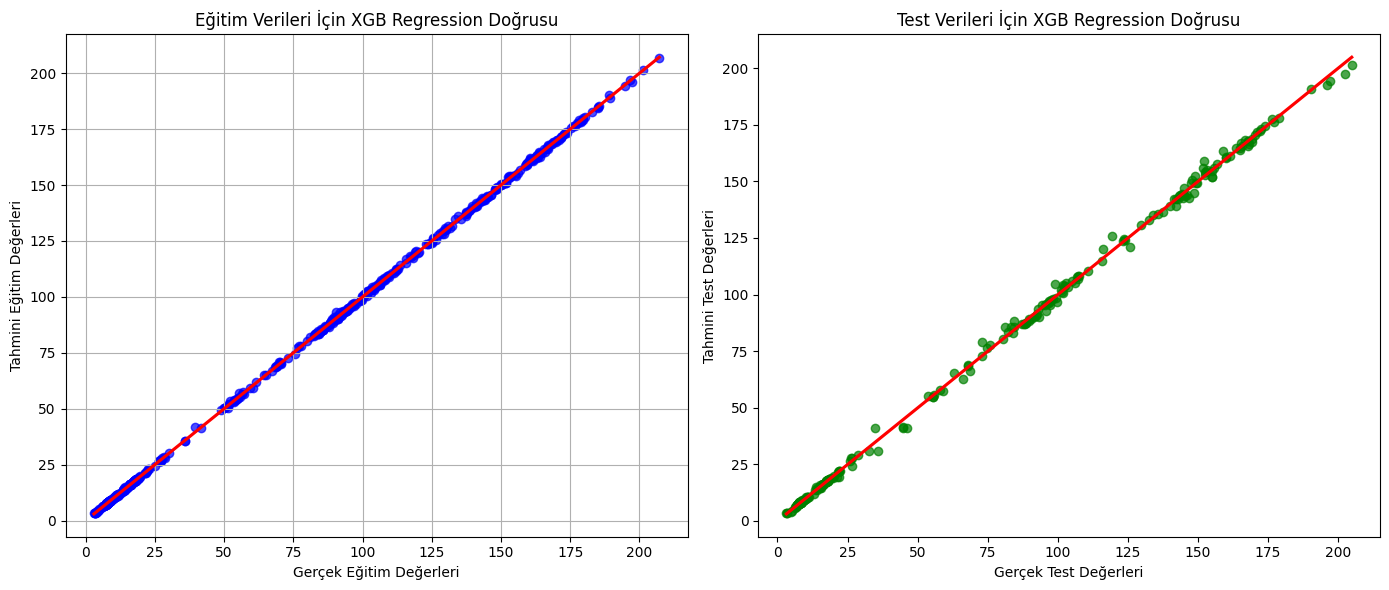

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.regplot(x= y_train, y= y_train_pred3, ci =None, scatter_kws={"alpha":0.7, "color":"blue"}, line_kws={"color":"red"})
plt.xlabel("Gerçek Eğitim Değerleri")
plt.ylabel("Tahmini Eğitim Değerleri")
plt.title("Eğitim Verileri İçin XGB Regression Doğrusu")
plt.grid(True)


plt.subplot(1,2,2)
sns.regplot(x= y_test, y= y_test_pred3, ci=None, scatter_kws={"alpha": 0.7, "color": "green"}, line_kws={"color":"red"})
plt.xlabel("Gerçek Test Değerleri")
plt.ylabel("Tahmini Test Değerleri")
plt.title("Test Verileri İçin XGB Regression Doğrusu")

plt.tight_layout()
plt.show()

In [ ]:
decisionTree_params = {                         # DECISION TREE REGRESSOR KULLANIMI
    'max_depth': [None, 5, 8, 10],
    'min_samples_split': [2, 4, 6]
}

dc = DecisionTreeRegressor(random_state=42)
grid_search3 = GridSearchCV(estimator= dc, param_grid= decisionTree_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

start_train_time = time.time()
grid_search3.fit(x_train_scaled, y_train)
best_model = grid_search3.best_estimator_
end_train_time = time.time()
train_time = end_train_time - start_train_time

print("En İyi Parametreler: ", grid_search3.best_params_)
print("En İyi CV Skoru (Negatif MSE): ", -grid_search3.best_score_)

y_train_pred4 = best_model.predict(x_train_scaled)
train_mse = mean_squared_error(y_train, y_train_pred4)
train_mae = mean_absolute_error(y_train, y_train_pred4)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred4)
train_kare = r2_score(y_train, y_train_pred4)

start_test_time = time.time()
y_test_pred4 = best_model.predict(x_test_scaled)
end_test_time = time.time()
total_time2 = end_test_time - start_test_time

test_mse = mean_squared_error(y_test, y_test_pred4)
test_mae = mean_absolute_error(y_test, y_test_pred4)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred4)
test_kare = r2_score(y_test, y_test_pred4)

print(f"Train Time: {train_time}")
print(f"Train MSE: {train_mse}")
print(f"Train MAE: {train_mae}")
print(f"Train MAPE: {train_mape}")
print(f"Train R2: {train_kare}")
print(f"Test Time: {total_time2}")
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")
print(f"Test MAPE: {test_mape}")
print(f"Test R2: {test_kare}")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
En İyi Parametreler:  {'max_depth': None, 'min_samples_split': 2}
En İyi CV Skoru (Negatif MSE):  5.131692019047618
Train Time: 0.9654557704925537
Train MSE: 3.7624526481129336e-33
Train MAE: 4.236145086010136e-18
Train MAPE: 6.121596945101353e-19
Train R2: 1.0
Test Time: 0.0006422996520996094
Test MSE: 5.17092962962963
Test MAE: 1.2645185185185188
Test MAPE: 0.019866406285219573
Test R2: 0.9986290531337979


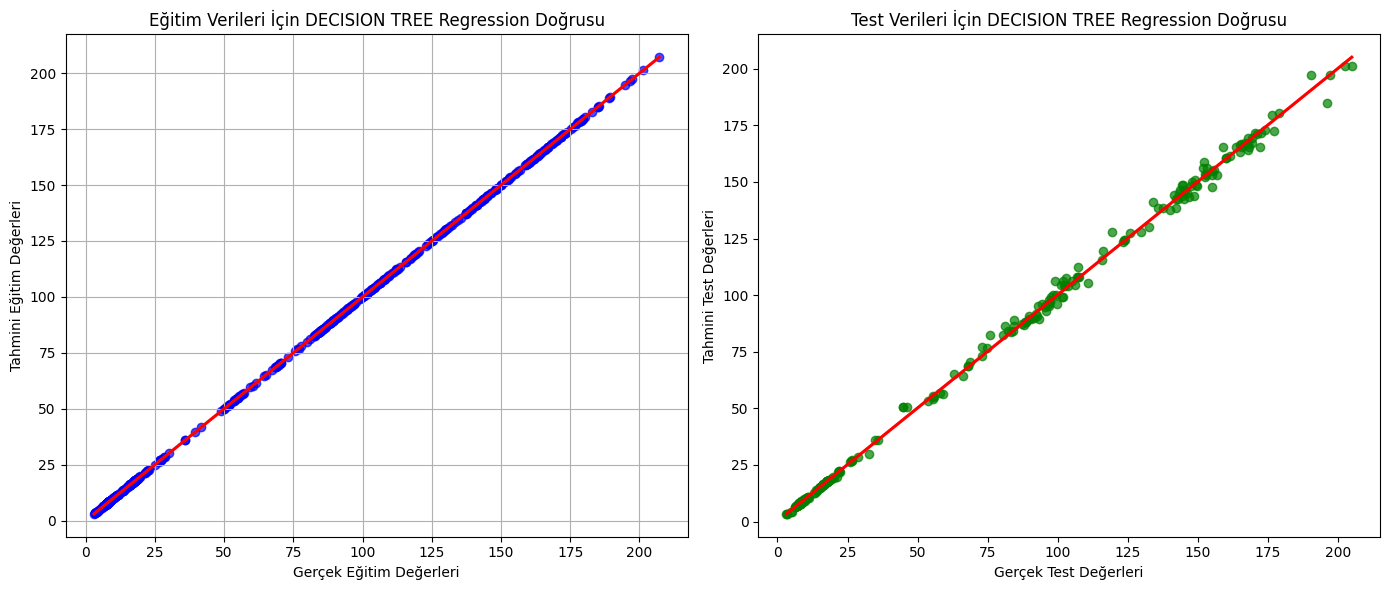

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.regplot(x= y_train, y= y_train_pred4, ci =None, scatter_kws={"alpha":0.7, "color":"blue"}, line_kws={"color":"red"})
plt.xlabel("Gerçek Eğitim Değerleri")
plt.ylabel("Tahmini Eğitim Değerleri")
plt.title("Eğitim Verileri İçin DECISION TREE Regression Doğrusu")
plt.grid(True)


plt.subplot(1,2,2)
sns.regplot(x= y_test, y= y_test_pred4, ci=None, scatter_kws={"alpha": 0.7, "color": "green"}, line_kws={"color":"red"})
plt.xlabel("Gerçek Test Değerleri")
plt.ylabel("Tahmini Test Değerleri")
plt.title("Test Verileri İçin DECISION TREE Regression Doğrusu")

plt.tight_layout()
plt.show()

In [ ]:
svr_params = {                              #SVR KULLANIMI
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['linear']
}

svr = SVR()
grid_search = GridSearchCV(estimator=svr, param_grid=svr_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

start_train_time = time.time()
model5 = grid_search.fit(x_train_scaled, y_train)
best_model = grid_search.best_estimator_
end_train_time = time.time()
total_time1 = end_train_time - start_train_time

print("En İyi Parametreler: ", grid_search.best_params_)
print("En İyi CV Skoru (Negatif MSE): ", -grid_search.best_score_)

y_train_pred5 = best_model.predict(x_train_scaled)
train_mse = mean_squared_error(y_train, y_train_pred5)
train_mae = mean_absolute_error(y_train, y_train_pred5)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred5)
train_kare = r2_score(y_train, y_train_pred5)

start_test_time = time.time()
y_test_pred5 = best_model.predict(x_test_scaled)
end_test_time = time.time()
total_time2 = end_test_time - start_test_time

test_mse = mean_squared_error(y_test, y_test_pred5)
test_mae = mean_absolute_error(y_test, y_test_pred5)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred5)
test_kare = r2_score(y_test, y_test_pred5)


print(f"Train Time: {total_time1}")
print(f"Train MSE: {train_mse}")
print(f"Train MAE: {train_mae}")
print(f"Train MAPE: {train_mape}")
print(f"Train R2: {train_kare}")
print(f"Test Time: {total_time2}")
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")
print(f"Test MAPE: {test_mape}")
print(f"Test R2: {test_kare}")


Fitting 5 folds for each of 9 candidates, totalling 45 fits
En İyi Parametreler:  {'C': 10, 'epsilon': 0.2, 'kernel': 'linear'}
En İyi CV Skoru (Negatif MSE):  2.790272773947857
Train Time: 3.3725662231445312
Train MSE: 2.632149398893
Train MAE: 0.9265372832511379
Train MAPE: 0.024916528916093368
Train R2: 0.9992812334934256
Test Time: 0.004645586013793945
Test MSE: 2.5049910432164366
Test MAE: 0.9760239602898267
Test MAPE: 0.02619646421562319
Test R2: 0.9993358622401505


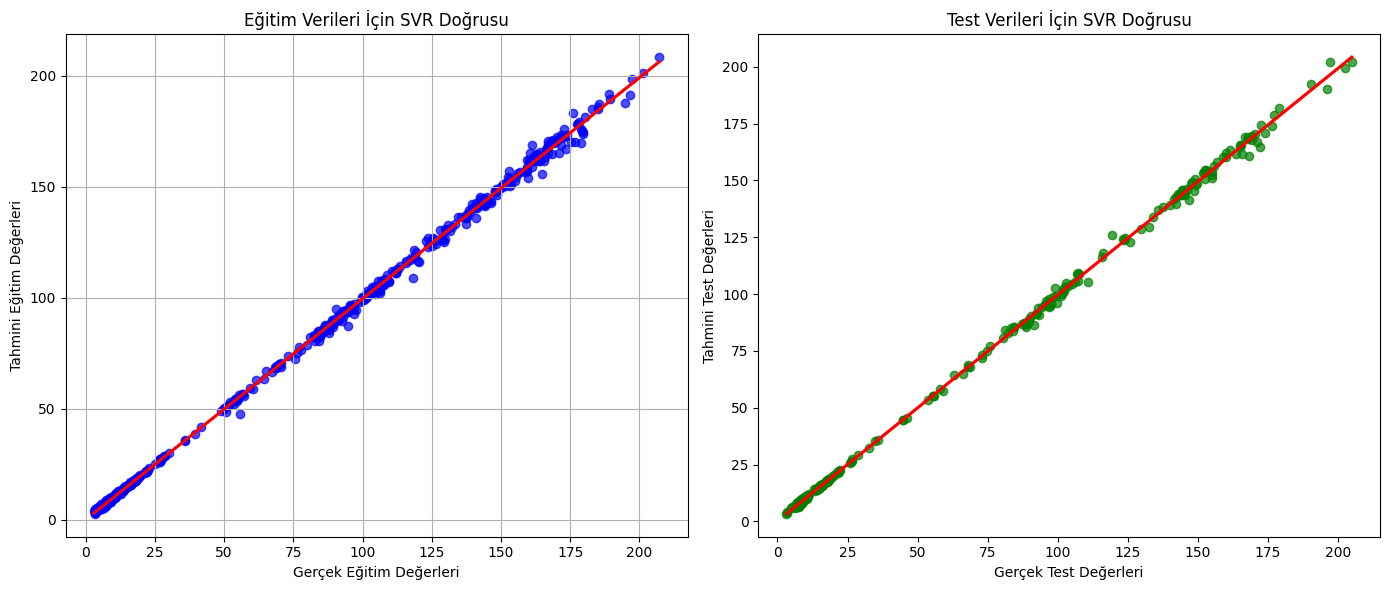

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.regplot(x= y_train, y= y_train_pred5, ci =None, scatter_kws={"alpha":0.7, "color":"blue"}, line_kws={"color":"red"})
plt.xlabel("Gerçek Eğitim Değerleri")
plt.ylabel("Tahmini Eğitim Değerleri")
plt.title("Eğitim Verileri İçin SVR Doğrusu")
plt.grid(True)


plt.subplot(1,2,2)
sns.regplot(x= y_test, y= y_test_pred5, ci=None, scatter_kws={"alpha": 0.7, "color": "green"}, line_kws={"color":"red"})
plt.xlabel("Gerçek Test Değerleri")
plt.ylabel("Tahmini Test Değerleri")
plt.title("Test Verileri İçin SVR Doğrusu")

plt.tight_layout()
plt.show()

In [ ]:
lasso_params = {                              #LASSO KULLANIMI
    'alpha': [0.001, 0.01, 0.1, 1, 10]
}

ls = Lasso()
grid_search = GridSearchCV(estimator=ls, param_grid=lasso_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

start_train_time = time.time()
grid_search.fit(x_train_scaled, y_train)
best_model = grid_search.best_estimator_
end_train_time = time.time()
total_time1 = end_train_time - start_train_time

print("En İyi Parametreler: ", grid_search.best_params_)
print("En İyi CV Skoru (Negatif MSE): ", -grid_search.best_score_)

y_train_pred6 = best_model.predict(x_train_scaled)
train_mse = mean_squared_error(y_train, y_train_pred6)
train_mae = mean_absolute_error(y_train, y_train_pred6)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred6)
train_kare = r2_score(y_train, y_train_pred6)


start_test_time = time.time()
y_test_pred6 = best_model.predict(x_test_scaled)
end_test_time = time.time()
total_time2 = end_test_time - start_test_time

test_mse = mean_squared_error(y_test, y_test_pred6)
test_mae = mean_absolute_error(y_test, y_test_pred6)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred6)
test_kare = r2_score(y_test, y_test_pred6)

print(f"Train Time: {total_time1}")
print(f"Train MSE:{train_mse}")
print(f"Train MAE: {train_mae}")
print(f"Train MAPE: {train_mape}")
print(f"Train R2: {train_kare}")
print(f"Test Time:{total_time2}")
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")
print(f"Test MAPE:{test_mape}")
print(f"Test R2: {test_kare}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
En İyi Parametreler:  {'alpha': 0.1}
En İyi CV Skoru (Negatif MSE):  3.833110072779598
Train Time: 5.59632134437561
Train MSE:3.4742684646763164
Train MAE: 1.172395603432049
Train MAPE: 0.04341898204423456
Train R2: 0.9990512742900128
Test Time:0.0002701282501220703
Test MSE: 3.806501747562997
Test MAE: 1.3132608211137804
Test MAPE:0.047583638912473344
Test R2: 0.9989907981705819


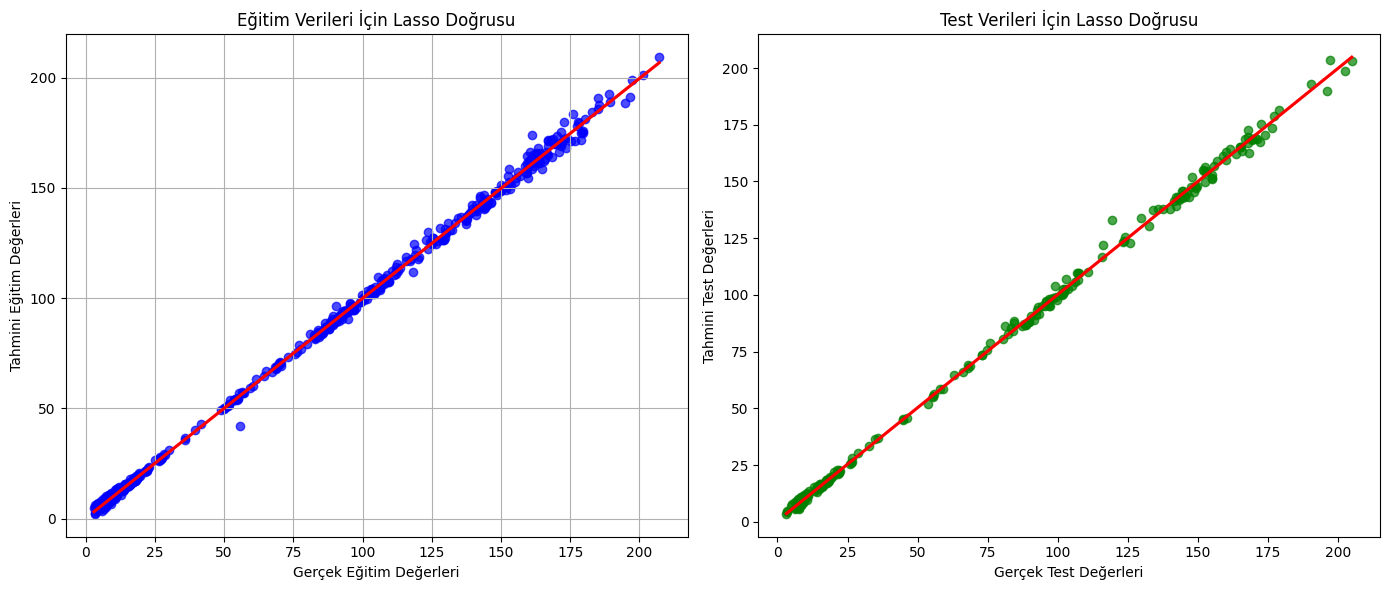

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.regplot(x= y_train, y= y_train_pred6, ci =None, scatter_kws={"alpha":0.7, "color":"blue"}, line_kws={"color":"red"})
plt.xlabel("Gerçek Eğitim Değerleri")
plt.ylabel("Tahmini Eğitim Değerleri")
plt.title("Eğitim Verileri İçin Lasso Doğrusu")
plt.grid(True)


plt.subplot(1,2,2)
sns.regplot(x= y_test, y= y_test_pred6, ci=None, scatter_kws={"alpha": 0.7, "color": "green"}, line_kws={"color":"red"})
plt.xlabel("Gerçek Test Değerleri")
plt.ylabel("Tahmini Test Değerleri")
plt.title("Test Verileri İçin Lasso Doğrusu")

plt.tight_layout()
plt.show()

In [ ]:
ridge_params={                                #RIDGE KULLANIMI
    'alpha': [0.001, 0.01, 0.1, 1, 10]
}

ridge = Ridge()
grid_search = GridSearchCV(estimator=ridge, param_grid=ridge_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

start_train_time = time.time()
grid_search.fit(x_train_scaled, y_train)
best_model = grid_search.best_estimator_
end_train_time = time.time()
total_time1 = end_train_time - start_train_time

print("En İyi Parametreler: ", grid_search.best_params_)
print("En İyi CV Skoru (Negatif MSE): ", -grid_search.best_score_)

y_train_pred7 = best_model.predict(x_train_scaled)
train_mse = mean_squared_error(y_train, y_train_pred7)
train_mae = mean_absolute_error(y_train, y_train_pred7)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred7)
train_kare = r2_score(y_train, y_train_pred7)

start_test_time = time.time()
y_test_pred7 = best_model.predict(x_test_scaled)
end_test_time = time.time()
total_time2 = end_test_time - start_test_time

test_mse = mean_squared_error(y_test, y_test_pred7)
test_mae = mean_absolute_error(y_test, y_test_pred7)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred7)
test_kare = r2_score(y_test, y_test_pred7)

print(f"Train Time: {total_time1}")
print(f"Train MSE: {train_mse}")
print(f"Train MAE: {train_mae}")
print(f"Train MAPE: {train_mape}")
print(f"Train R2: {train_kare}")
print(f"Test Time: {total_time2}")
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")
print(f"Test MAPE: {test_mape}")
print(f"Test R2: {test_kare}")


Fitting 5 folds for each of 5 candidates, totalling 25 fits
En İyi Parametreler:  {'alpha': 0.001}
En İyi CV Skoru (Negatif MSE):  2.0450139623846493
Train Time: 4.675186395645142
Train MSE: 1.924749303725905
Train MAE: 0.8403151173065927
Train MAPE: 0.025742505026342604
Train R2: 0.9994744047075548
Test Time: 0.0003986358642578125
Test MSE: 1.7941458715373708
Test MAE: 0.8714455123951904
Test MAPE: 0.02707835486311685
Test R2: 0.9995243256365355


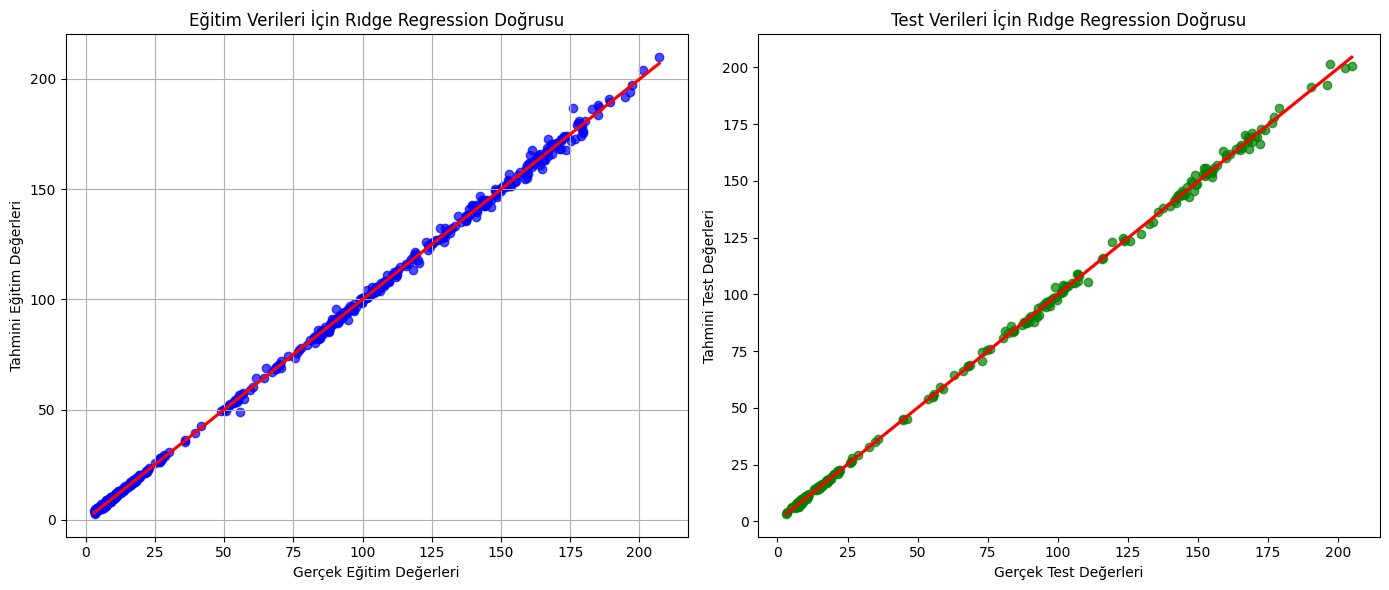

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.regplot(x= y_train, y= y_train_pred7, ci =None, scatter_kws={"alpha":0.7, "color":"blue"}, line_kws={"color":"red"})
plt.xlabel("Gerçek Eğitim Değerleri")
plt.ylabel("Tahmini Eğitim Değerleri")
plt.title("Eğitim Verileri İçin Rıdge Regression Doğrusu")
plt.grid(True)


plt.subplot(1,2,2)
sns.regplot(x= y_test, y= y_test_pred7, ci=None, scatter_kws={"alpha": 0.7, "color": "green"}, line_kws={"color":"red"})
plt.xlabel("Gerçek Test Değerleri")
plt.ylabel("Tahmini Test Değerleri")
plt.title("Test Verileri İçin Rıdge Regression Doğrusu")

plt.tight_layout()
plt.show()

In [ ]:
elasticNet_params={                               #ELASTICNET KULLANIMI
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.9]
}

elastic_net = ElasticNet()
grid_search = GridSearchCV(estimator=elastic_net, param_grid=elasticNet_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1 )

start_train_time = time.time()
grid_search.fit(x_train_scaled, y_train)
best_model = grid_search.best_estimator_
end_train_time = time.time()
total_time1 = end_train_time - start_train_time

print("En İyi Parametreler: ", grid_search.best_params_)
print("En İyi CV Skoru (Negatif MSE): ", -grid_search.best_score_)

y_train_pred8 = best_model.predict(x_train_scaled)
train_mse = mean_squared_error(y_train, y_train_pred8)
train_mae = mean_absolute_error(y_train, y_train_pred8)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred8)
train_kare = r2_score(y_train, y_train_pred8)

start_test_time = time.time()
y_test_pred8 = best_model.predict(x_test_scaled)
end_test_time = time.time()
total_time2 = end_test_time - start_test_time

test_mse = mean_squared_error(y_test, y_test_pred8)
test_mae = mean_absolute_error(y_test, y_test_pred8)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred8)
test_kare = r2_score(y_test, y_test_pred8)

print(f"Train Time: {total_time1}")
print(f"Train MSE: {train_mse}")
print(f"Train MAE: {train_mae}")
print(f"Train MAPE: {train_mape}")
print(f"Train R2: {train_kare}")
print(f"Test Time: {total_time2}")
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")
print(f"Test MAPE: {test_mape}")
print(f"Test R2: {test_kare}")

Fitting 5 folds for each of 15 candidates, totalling 75 fits
En İyi Parametreler:  {'alpha': 0.01, 'l1_ratio': 0.9}
En İyi CV Skoru (Negatif MSE):  3.2455591850371386
Train Time: 5.412950038909912
Train MSE: 2.9518221889755343
Train MAE: 1.0742336555138206
Train MAPE: 0.04376377419674792
Train R2: 0.9991939397802833
Test Time: 0.0002765655517578125
Test MSE: 2.84799709016266
Test MAE: 1.1848827356127072
Test MAPE: 0.047509818798084254
Test R2: 0.9992449224867926


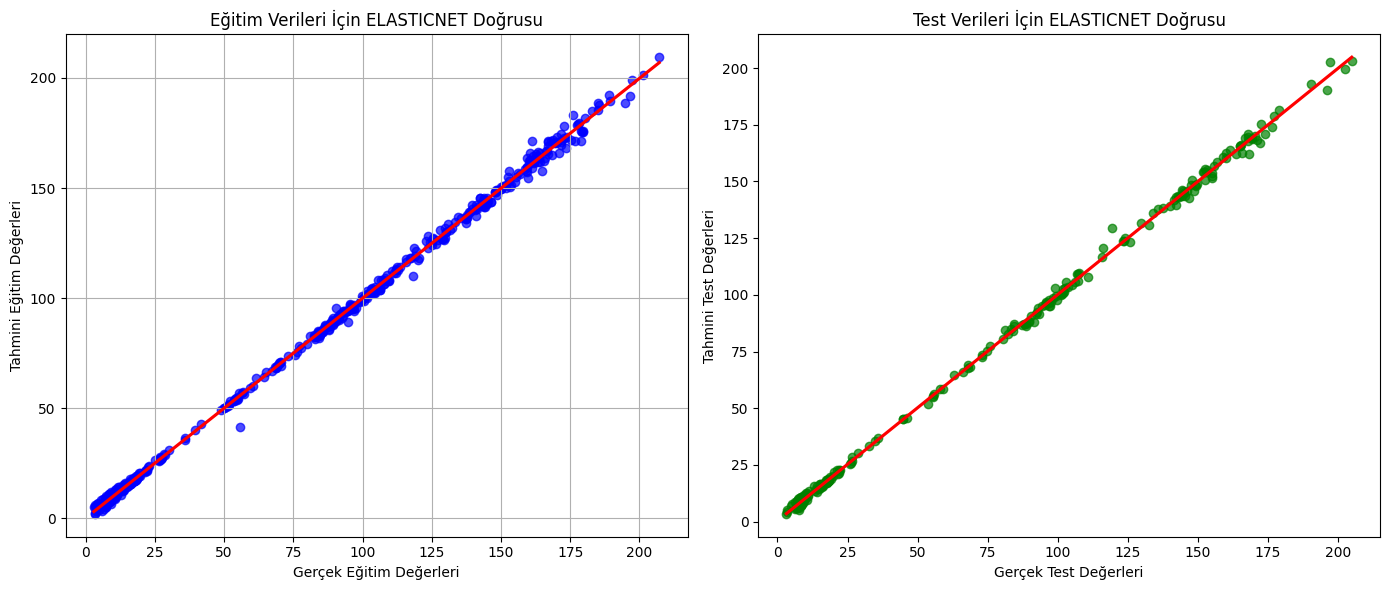

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.regplot(x= y_train, y= y_train_pred8, ci =None, scatter_kws={"alpha":0.7, "color":"blue"}, line_kws={"color":"red"})
plt.xlabel("Gerçek Eğitim Değerleri")
plt.ylabel("Tahmini Eğitim Değerleri")
plt.title("Eğitim Verileri İçin ELASTICNET Doğrusu")
plt.grid(True)


plt.subplot(1,2,2)
sns.regplot(x= y_test, y= y_test_pred8, ci=None, scatter_kws={"alpha": 0.7, "color": "green"}, line_kws={"color":"red"})
plt.xlabel("Gerçek Test Değerleri")
plt.ylabel("Tahmini Test Değerleri")
plt.title("Test Verileri İçin ELASTICNET Doğrusu")

plt.tight_layout()
plt.show()

In [ ]:
neighbour_params= {                                   #K NEIGHBORS REGRESSOR KULLANIMI
    'n_neighbors': [3, 5, 7, 9]
}

knn = KNeighborsRegressor()
grid_search = GridSearchCV(estimator=knn, param_grid=neighbour_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

start_train_time = time.time()
grid_search.fit(x_train_scaled, y_train)
best_model = grid_search.best_estimator_
end_train_time = time.time()
total_time1 = end_train_time - start_train_time

print("En İyi Parametreler: ", grid_search.best_params_)
print("En İyi CV Skoru (Negatif MSE): ", -grid_search.best_score_)


y_train_pred9 = best_model.predict(x_train_scaled)
train_mse = mean_squared_error(y_train, y_train_pred9)
train_mae = mean_absolute_error(y_train, y_train_pred9)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred9)
train_kare = r2_score(y_train, y_train_pred9)

start_test_time = time.time()
y_test_pred9 = best_model.predict(x_test_scaled)
end_test_time = time.time()
total_time2 = end_test_time - start_test_time

test_mse = mean_squared_error(y_test, y_test_pred9)
test_mae = mean_absolute_error(y_test, y_test_pred9)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred9)
test_kare = r2_score(y_test, y_test_pred9)

print(f"Train Time: {total_time1}")
print(f"Train MSE: {train_mse}")
print(f"Train MAE: {train_mae}")
print(f"Train MAPE: {train_mape}")
print(f"Train R2: {train_kare}")
print(f"Test Time: {total_time2}")
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")
print(f"Test MAPE: {test_mape}")
print(f"Test R2: {test_kare}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
En İyi Parametreler:  {'n_neighbors': 7}
En İyi CV Skoru (Negatif MSE):  12.028620059319724
Train Time: 0.16194558143615723
Train MSE: 7.664788780377022
Train MAE: 1.605809675221441
Train MAPE: 0.05952658028080149
Train R2: 0.9979069601985284
Test Time: 0.002346515655517578
Test MSE: 12.595522282690863
Test MAE: 2.0484550264550276
Test MAPE: 0.06589597620330434
Test R2: 0.9966606020506084


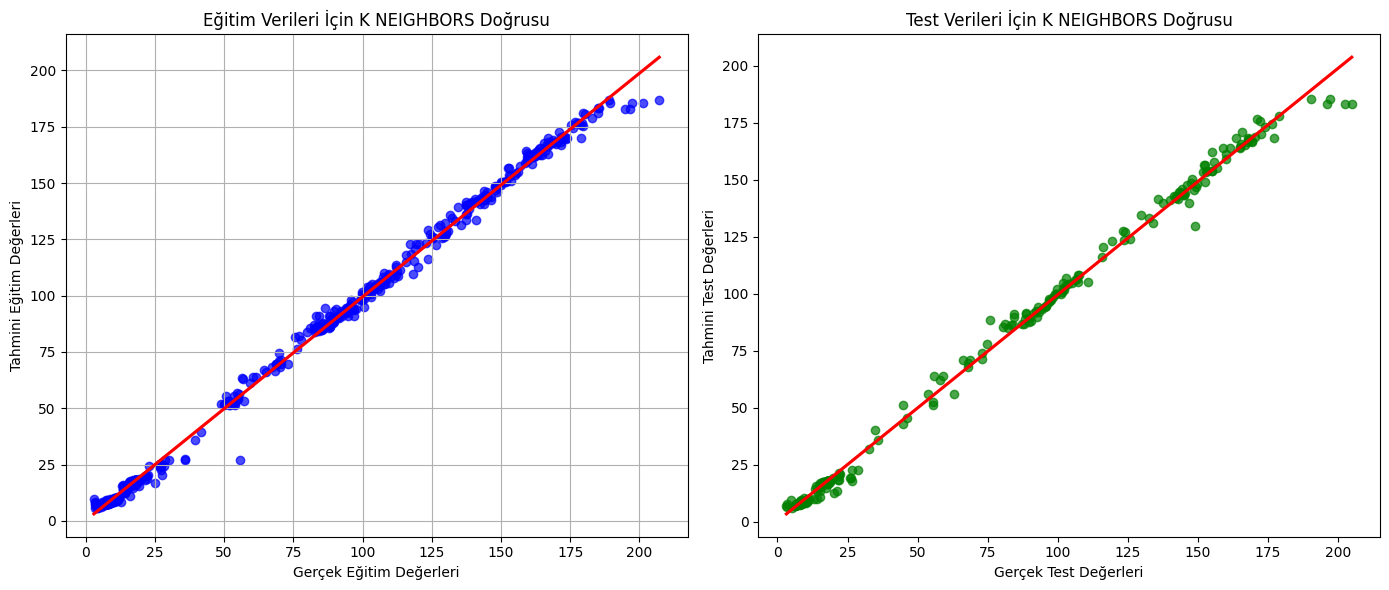

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.regplot(x= y_train, y= y_train_pred9, ci =None, scatter_kws={"alpha":0.7, "color":"blue"}, line_kws={"color":"red"})
plt.xlabel("Gerçek Eğitim Değerleri")
plt.ylabel("Tahmini Eğitim Değerleri")
plt.title("Eğitim Verileri İçin K NEIGHBORS Doğrusu")
plt.grid(True)


plt.subplot(1,2,2)
sns.regplot(x= y_test, y= y_test_pred9, ci=None, scatter_kws={"alpha": 0.7, "color": "green"}, line_kws={"color":"red"})
plt.xlabel("Gerçek Test Değerleri")
plt.ylabel("Tahmini Test Değerleri")
plt.title("Test Verileri İçin K NEIGHBORS Doğrusu")

plt.tight_layout()
plt.show()